# 這裡可做為測試使用，請隨意修改

In [3]:
from functions.Particles import Particles
import scipy.constants as const

In [2]:
N=10
x=Particles(N)
print(x.pos)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(10, 2)
[[24.47595446  0.        ]
 [27.87490516  0.        ]
 [16.44124213  0.        ]
 [31.55777241  0.        ]
 [20.99293269  0.        ]
 [29.42954913  0.        ]
 [28.22325605  0.        ]
 [14.97054682  0.        ]
 [49.46342272  0.        ]
 [ 3.2018012   0.        ]]
[[24.47595446 23.72112085]
 [27.87490516  4.59129869]
 [16.44124213  1.23730623]
 [31.55777241 37.70400803]
 [20.99293269 36.73949392]
 [29.42954913 43.63574125]
 [28.22325605  4.84461051]
 [14.97054682 17.69937509]
 [49.46342272 13.36990542]
 [ 3.2018012  14.16281388]]
None


In [9]:
air_mass=const.physical_constants['alpha particle mass'][0]*7
print(air_mass)

4.65126013499e-26


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell
import gc

def generate_initial_velocities_2d(N, temperature, mass):
    # 使用 maxwell.rvs() 生成速度向量
    speeds = np.zeros((N, 2))
    vel = maxwell.rvs(scale=np.sqrt(k*temperature / mass), size=(N, 1))
    theta = np.random.uniform(0, 2*np.pi, N) #random angle
    speeds[:,0] = vel[:]*np.cos(theta)
    speeds[:,1] = vel[:]*np.sin(theta)
    return speeds
gc.collect()
# 參數設定
k=const.Boltzmann
N_particles = 10000 # 粒子數量
temperature = 300  # 溫度 (K)
mass = 4 * 1.66054e-27  # Alpha粒子的質量 (kg)，假設為4個中子和質子的總質量

# 生成初始速度向量
initial_velocities_2d = generate_initial_velocities_2d(N_particles, temperature, mass)

# 計算速度大小
#speeds_magnitude=np.sqrt(initial_velocities_2d[:,0]**2+initial_velocities_2d[:,1]**2)
speeds_magnitude = np.linalg.norm(initial_velocities_2d, axis=1)

# 繪製速度大小與對應數量的關係圖
plt.hist(speeds_magnitude, bins=50, alpha=0.6, color='g', density=True, label='Simulation')

# 計算理論上的波茲曼速度分布
speeds_range = np.linspace(0, np.max(speeds_magnitude), 100)
theory_distribution = maxwell.pdf(speeds_range, scale=np.sqrt(k*temperature / mass))
plt.plot(speeds_range, theory_distribution, 'r--', label='Theory')

plt.title('Speed Distribution')
plt.xlabel('Speed (m/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


ValueError: could not broadcast input array from shape (10000,10000) into shape (10000,)

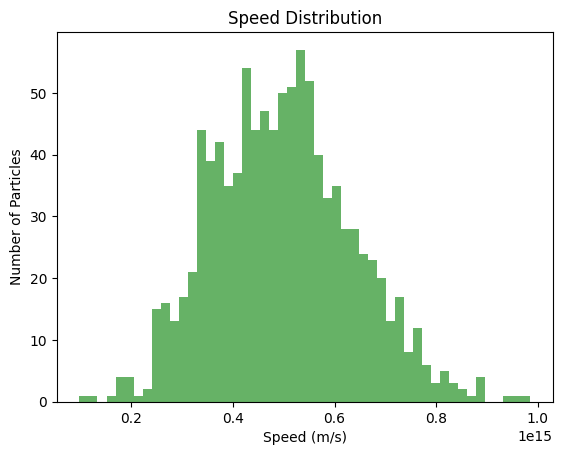

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell

def generate_initial_velocities_2d(N, temperature, mass):
    # 使用 maxwell.rvs() 生成速度向量
    speeds = maxwell.rvs(scale=np.sqrt(temperature / mass), size=(N, 2))
    return speeds

# 參數設定
N_particles = 1000  # 粒子數量
temperature = 300  # 溫度 (K)
mass = 4 * 1.66054e-27  # Alpha粒子的質量 (kg)，假設為4個中子和質子的總質量

# 生成初始速度向量
initial_velocities_2d = generate_initial_velocities_2d(N_particles, temperature, mass)

# 計算速度大小
speeds_magnitude = np.linalg.norm(initial_velocities_2d, axis=1)

# 繪製速度大小與對應數量的關係圖
plt.hist(speeds_magnitude, bins=50, alpha=0.6, color='g')
plt.title('Speed Distribution')
plt.xlabel('Speed (m/s)')
plt.ylabel('Number of Particles')
plt.show()
